Stationarity - The data isn't moving. 

If you remove stationality and trend, the compenent will the irregular.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.tsa.arima.model.ARIMA
#from statsmodels.tsa.arima.model.SARIMAX
from statsmodels.tsa.stattools import adfuller,acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pylab import rcParams

## Import The Library <a id ="30"></a>
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It’s plotting library, and we are going to use it for data visualization
* seaborn: It’s a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
* statsmodels: Using statsmodels module classes and functions for time series analysis and forecasting 
   * adfuller: Augmented Dickey-Fuller
   * ACF: Auto Correlation Function
   * PACF: Partial Auto Correlation Function
   * ARIMA: Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
   * sm.tsa.seasonal.seasonal_decompose: For decomposition of time series
* rcParams: To change the matplotlib properties like figure size

In [2]:
# Set plot size 
rcParams['figure.figsize'] = 10, 6

In [3]:
import os

In [4]:
os.chdir(r"C:\Users\sarit\Documents\Careerera\Internship\Class Files\Dataset\analysispredictedairpassenger")

In [5]:
df=pd.read_csv("AIR_PASSENGER.csv")
print('Shape of the data= ', df.shape)
print('Column datatypes= \n',df.dtypes)
df

Shape of the data=  (144, 2)
Column datatypes= 
 Month         object
Passengers     int64
dtype: object


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [6]:
#df.diff()

## Understanding The Data <a id ="31"></a>
* Dataframe 'df' contains the time series data. There are two columns 'Month' and 'Passengers'. Month column contains the value of month in that year and passenger column contains the number of air passenger for that particular month.
* As you may have noticed 'Month' column datatype is 'Object', so we are going to convert it to 'datetime'
* To make plotting easier, we set the index of pandas dataframe 'df' to the 'Month' column so that it will act as x-axis & Passenger column as y-axis

In [7]:
df['Month'] = pd.to_datetime(df.Month)
df = df.set_index(df.Month)
df.drop('Month', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Passengers    int64
dtype: object


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


# Characteristics of Time Series

Trend

Text(0.5, 1.0, 'Trend of the Time Series')

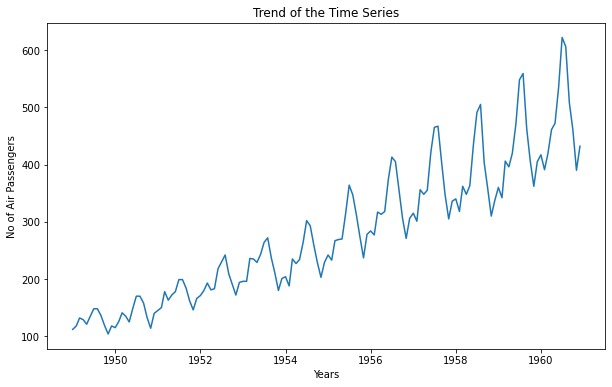

In [9]:
plt.figure(figsize= (10,6))
plt.plot(df)
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')
plt.title('Trend of the Time Series')

In [10]:
# There is an upward trend

### Variance
In above graph you can clearly see that the variation is also increasing with the level of the series. You will see in the later part of this exercise how we handle the variance to increase the stationarity of the series.

### Seasonality
We can also see the graph going up and down at regular interval, that is the sign of seasonality. Let's plot the graph for few months to visualize for seasonality.

In [11]:
# To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month

In [12]:
df_temp

,Passengers,Year,Month
Month,,,
1949-01-01,112,1949,1
1949-02-01,118,1949,2
1949-03-01,132,1949,3
1949-04-01,129,1949,4
1949-05-01,121,1949,5
...,...,...,...
1960-08-01,606,1960,8
1960-09-01,508,1960,9
1960-10-01,461,1960,10


Understanding Seasons by Visual Analysis

<AxesSubplot:title={'center':'Seasonality of the Time Series'}, xlabel='Month', ylabel='Passengers'>

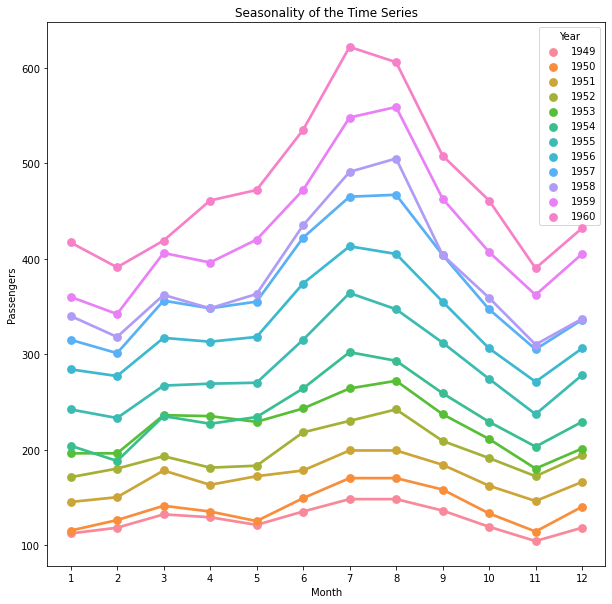

In [13]:
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Passengers',hue='Year',data=df_temp)

From above graph we can say that every year in month of July we observe maximum number of passengers and similarly minimum number of passenger in the month of November.

### Decomposition of Time Series
Let's now use the decomposition technique to deconstruct the time series data into several component like trend and seasonality for visualization of time series characteristics.

Here we are going to use 'additive' model because it is quick to develop, fast to train, and provide interpretable patterns.

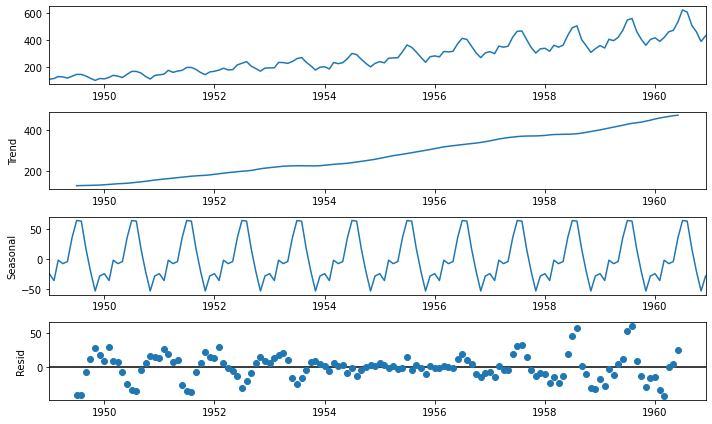

In [14]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

Additive Decomposition:

TS is a function of the sum of components. 
Y = T ( Trend) + S ( Seasonality)+ R (Residul)

Stationary Series(R) = Y - T - S 

Mutliplicative: 

TS data is a function of its components. 
Y=T*S*R
R=Y/(T*S)

Can tell dif from varation.If magnitude of seasonal component changes over time, it is multiplicative. Otherwise it's addictive. 

Check for stationarity.

In [15]:
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()

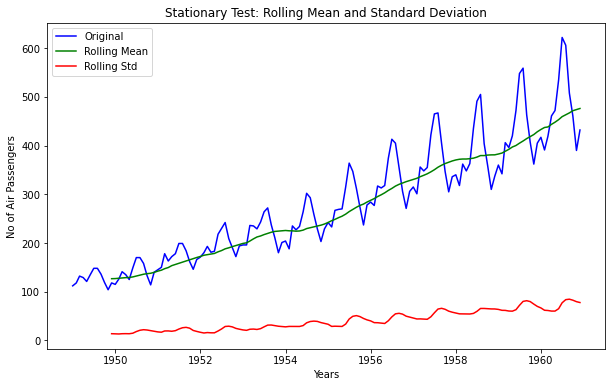

In [16]:
# Lets test the stationarity score with original series data
stationarity_test(df)

ADF Test: Test for stationarity. 

In [17]:
   # Dickey-Fuller test
    
def ADF(timeseries):
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print(df_output)

In [18]:
ADF(df)

Results of Dickey-Fuller Test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


Ho: p value = alpha
Ha: P value != alpha

Here the p value is less than alpha so the series isn't stationary. 

Though it's clear from visual observation that it's not a stationary series, but still lets have look at the rolling statistics and Duckey Fuller test results

* Rolling statistics: Standard deviation has very less variation but mean is increasing continuously.
* Duckey Fuller Test: Test statistic is way more than the critical values.

### Convert Non-Stationary Data to Stationary Data

##  Business Scenario1 -  So project manager will provide basic Differencing techniques for Both AR and MA model
Let's first use the differencing technique to obtain the stationarity.

#### Differencing
To transform the series using 'Differencing' we will use the diff() method of pandas. A benefit of using the Pandas function, in addition to requiring less code, is that it maintains the date-time information for the differenced series

In [19]:
df_diff=df.diff(periods=1)

In [20]:
df.diff

<bound method DataFrame.diff of             Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]>

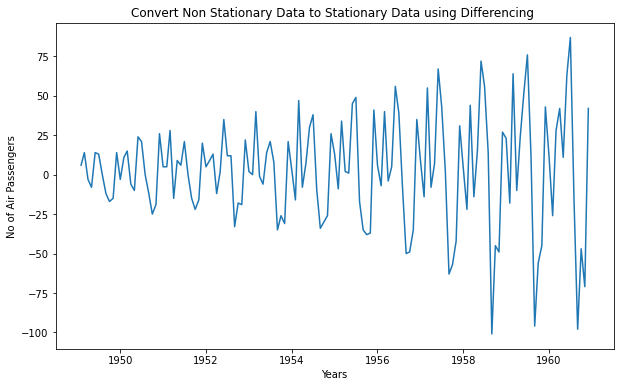

In [21]:
 # First order differencing
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Differencing ')
plt.plot(df_diff)

In [22]:
df_diff.shape

(144, 1)

In [23]:
df.shape

(144, 1)

So from above graph its clear that differencing technique removed the trend from the time series, but variance is still there Now lets run the stationarity_test() to check the effectiveness of the 'Differencing' technique

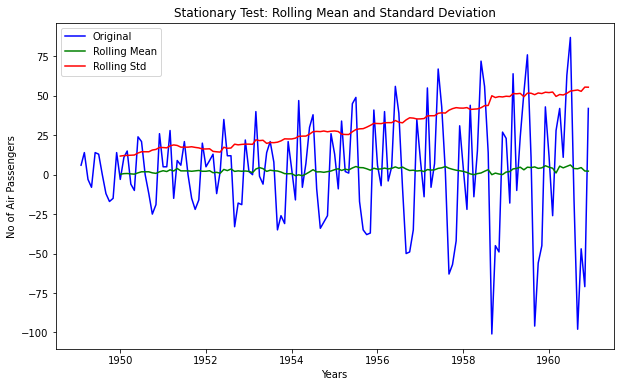

In [24]:
df_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_diff)

In [25]:
###### Lag always reduce data value point in TIME Series

In [26]:
df_diff.shape

(143, 1)

In [27]:
ADF(df_diff)

Results of Dickey-Fuller Test
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
dtype: float64


## Basic Differencing failed
The rolling values appear to be varying slightly, and we can see there is slight upward trend in standard deviation. Also, the test statistic is smaller than the 10% critical but since p-value is greater than 0.05 it is not a stationary series.

Note that variance in the series is also affecting above results, which can be removed using transformation technique.

Let's also check with transformation technique


#### Transformation


Since variance is proportional to the levels, we are going to use the log transformation.

# Log Transformation is Arun's (AR Model) way of getting Stationary series

As we know that AR model uses MLE instead of OLS .
So we using Log

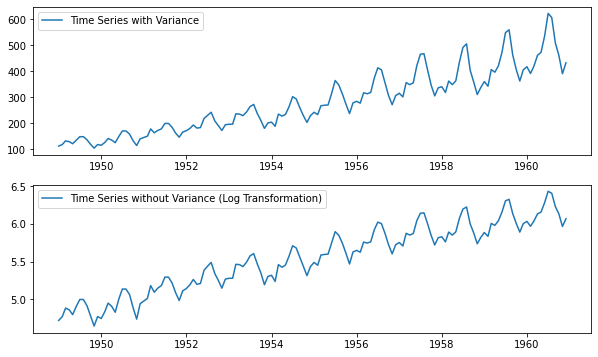

In [28]:
df_log = np.log(df)

plt.subplot(211)
plt.plot(df, label= 'Time Series with Variance')
plt.legend()
plt.subplot(212)
plt.plot(df_log, label='Time Series without Variance (Log Transformation)')
plt.legend()  
plt.show()

### After using Log Tranformation out series values will be changed , to we will reverse the effect of log using exp function later

Since log transformation has removed the variance from series, lets use this transformed data hence forward. 
Note that, Since we are using log transformation, we can use the exponential of the series to get the original scale back.
```
    df = exp(df_log)
```

Let cross-check the differencing method scores with this log transformed data again.

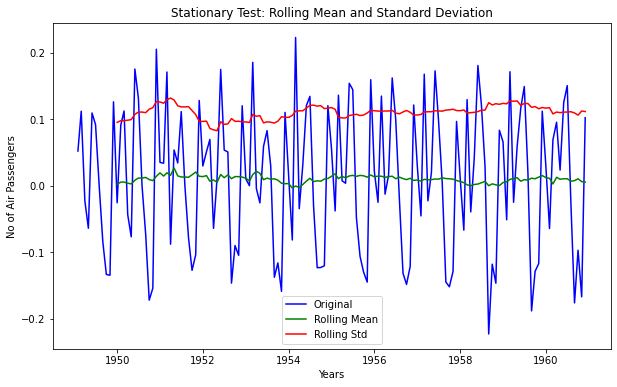

In [29]:
df_log_diff = df_log.diff(periods = 1) # First order differencing

df_log_diff.dropna(inplace = True)# Data transformation may add na values
stationarity_test(df_log_diff)

In [30]:
ADF(df_log_diff)

Results of Dickey-Fuller Test
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
dtype: float64


#### The rolling mean and standard deviation values are okay now. The test statistic is smaller than the 10% critical values but since p-value is greater than 0.05 it is not a stationary series.



Let's also check with Moving Average technique…

#### Moving Average

Since we have time series data from 1 Jan 1949 to 1 Dec 1960, we will define a yearly window for moving average. Window size = 12. Note that we are going to use Log transformed data.

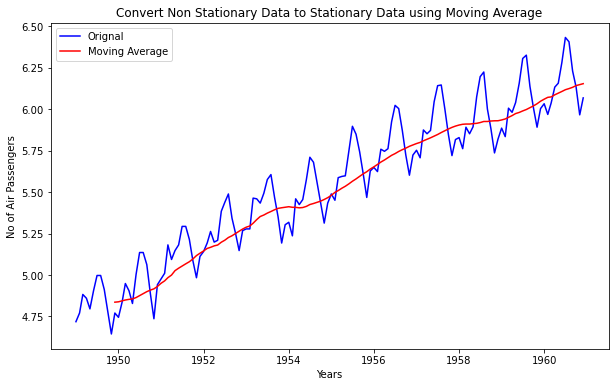

In [31]:
df_log_moving_avg = df_log.rolling(window = 12).mean()
plt.xlabel('Years')
plt.ylabel('No of Air Passengers')    
plt.title('Convert Non Stationary Data to Stationary Data using Moving Average')
plt.plot(df_log, color= 'blue', label='Orignal')
plt.plot(df_log_moving_avg, color= 'red', label='Moving Average')
plt.legend()

As you can see from above graph that data is more smooth without any variance. If we use the differencing technique with log transformed data and mean average data then we should get better stationarity scores

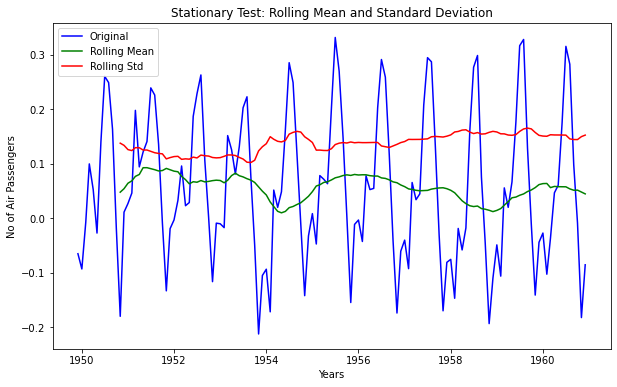

In [32]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

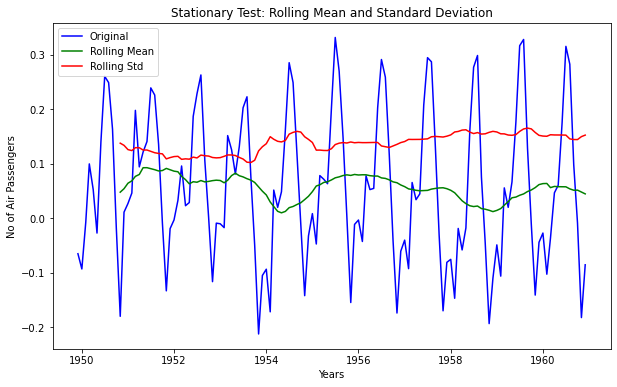

In [33]:
df_log_moving_avg_diff = df_log - df_log_moving_avg
df_log_moving_avg_diff.dropna(inplace = True)
stationarity_test(df_log_moving_avg_diff)

In [34]:
df_log_moving_avg_diff.shape

(133, 1)

In [35]:
ADF(df_log_moving_avg_diff)

Results of Dickey-Fuller Test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
dtype: float64


As expected now we are able to see some real improvements. p-value is less than 0.05 that means our series is stationary, but we can only say this with 95% of confidence, as test statistics is less than 5% critical value.

In order to increase the stationarity of the series lets try to use 'Weighted Moving Average' technique

#### Weighted Moving Average (WMA) or Smoothing / Exponential Moving Average

Here we are going to use exponentially weighted moving average with parameter ‘alpha = 0.12’ and ‘halflife = 12’. This parameter defines the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

As expected now we are able to see some real improvements. p-value is less than 0.05 that means our series is stationary, but we can only say this with 95% of confidence, as test statistics is less than 5% critical value.

In order to increase the stationarity of the series lets try to use 'Weighted Moving Average' technique

#### Weighted Moving Average (WMA) or Smoothing / Exponential Moving Average

Here we are going to use exponentially weighted moving average with parameter ‘alpha = 0.12’ and ‘halflife = 12’. This parameter defines the amount of exponential decay. This is just an assumption here and would depend largely on the business domain.

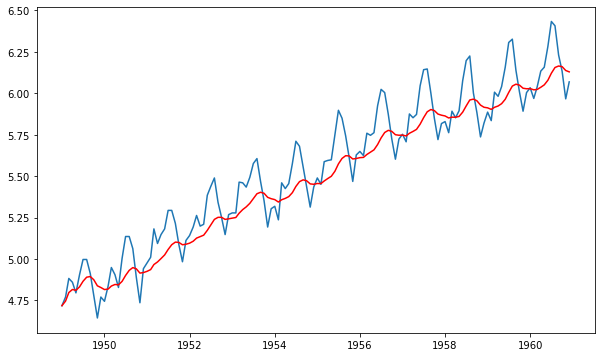

In [36]:
df_log_weighted_avg = df_log.ewm(alpha=0.12,).mean()
plt.plot(df_log)
plt.plot(df_log_weighted_avg, color = 'red')

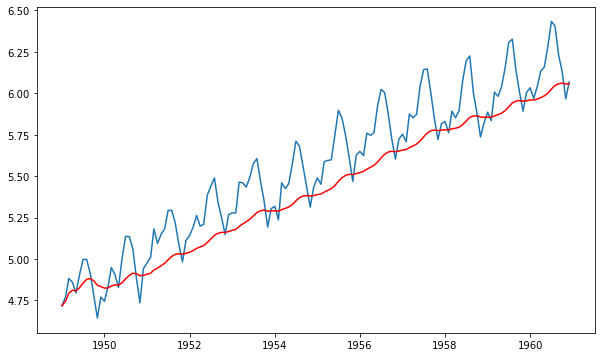

In [37]:
df_log_weighted_avg = df_log.ewm(halflife = 12).mean()
plt.plot(df_log)
plt.plot(df_log_weighted_avg, color = 'red')

Notice that WMA follow's no of passenger values more closely than a corresponding Simple Moving Average which also results in more accurate trend direction. Now lets check, the effect of this on stationarity scores!

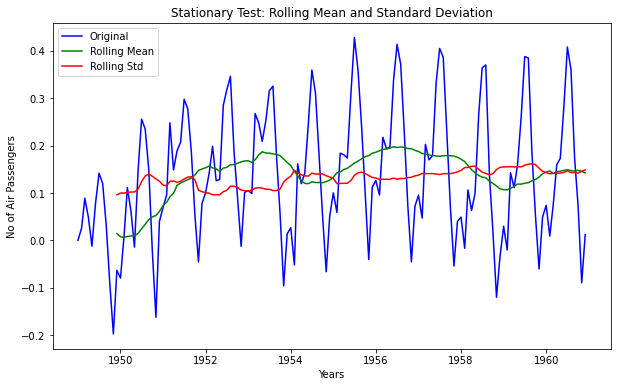

In [38]:
df_log_weighted_avg_diff = df_log - df_log_weighted_avg
stationarity_test(df_log_weighted_avg_diff)

In [39]:
df_log_weighted_avg.shape

(144, 1)

In [40]:
ADF(df_log_weighted_avg_diff)

Results of Dickey-Fuller Test
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


Test statistic is smaller than the 1% critical value, which is better than the previous case. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

There is one more way to obtain better stationarity is by using the residual data from time series decomposition.

#### Decomposition of Time Series

Let's now use the decomposition technique to deconstruct the log transformed time series data, so that we can check the stationarity using residual data.

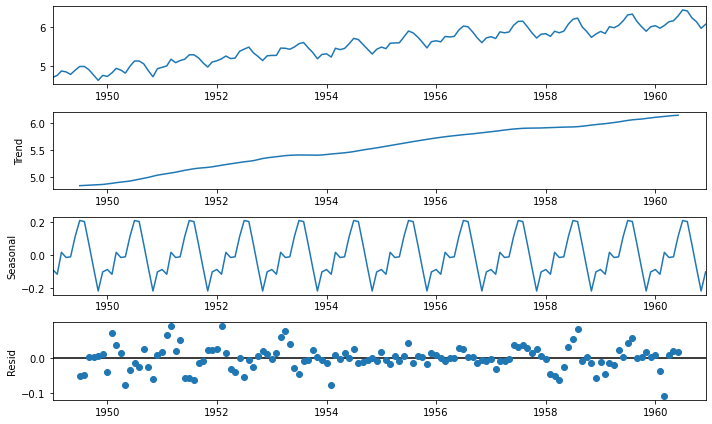

In [41]:
decomposition = sm.tsa.seasonal_decompose(df_log,period =12)
fig = decomposition.plot()

In [42]:
ADF(df_log)

Results of Dickey-Fuller Test
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
dtype: float64


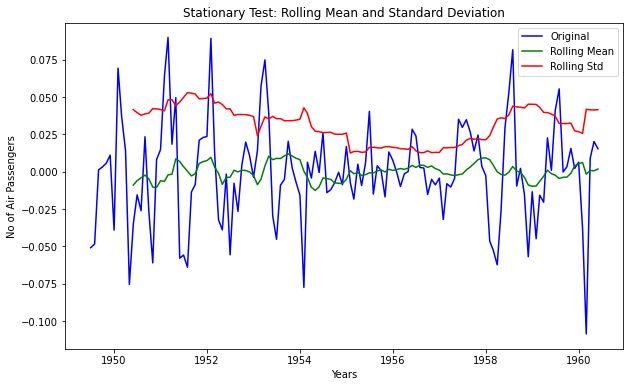

In [43]:
df_log_residual = decomposition.resid
df_log_residual.dropna(inplace = True)
stationarity_test(df_log_residual)

In [44]:
ADF(df_log_residual)

Results of Dickey-Fuller Test
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
dtype: float64


The Dickey-Fuller test statistic is significantly lower than the 1% critical value and p-value is almost 0. So this time series is very close to stationary. This concludes our time series analysis and data transformation to get the stationary series. Now we can start modeling it for forecast.

## Forecasting <a id ="34"></a>
* Though using residual values gives us very good results, but it's relatively difficult to add noise and seasonality back into predicted residuals in this case. 
* So we are going to make model on the time series(df_log_diff), where we have used log transformation and differencing technique. This is one of the most popular and beginner-friendly technique. As per our time series analysis 'df_log_diff' is not a perfectly stationary series, that's why we are going to use statistical models like ARIMA to forecast the data.
* Remember that ARIMA model uses three parameters, 'p' for the order of Auto-Regressive (AR) part, 'q' for the order of Moving Average (MA) part and 'd' for the order of integrated part. We are going to use d =1 but to find the value for p and q lets plot ACF and PACF.
* Note that since we are using d=1, first order of differencing will be performed on given series. Since first value of time series don't have any value to subtract from resulting series will have one less value from original series

### ACF and PACF Plots
* To figure out the order of AR model(p) we will use PACF function. p = the lag value where the PACF chart crosses the upper confidence interval for the first time
* To figure out the order of MA model(q) we will use ACF function. q = the lag value where the ACF chart crosses the upper confidence interval for the first time

p = AR
d = Requirement for both AR and Ma
q= requirement for MA

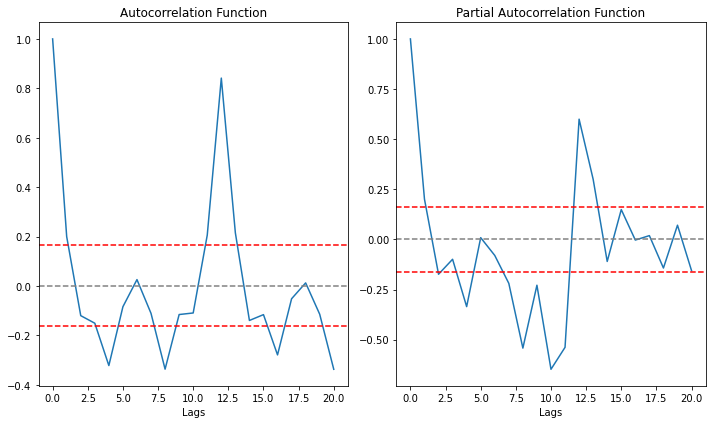

In [45]:
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

# Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
# Draw 95% confidence interval line
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='red')
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# ARIMA

p = Non seasonal AR order. No of Lag obvs (Lag Order)
d = Non-seasonal differencing. No of times raw obvs are differenced(degree of differencing)
q=  Non-seasonal MA order. Size of ma window. (moving avg)

m = no of periods


SARIMA - Seasonal ARIMA
P = Seasonal AR Order
Q = Seasonal MA Order
D = Seasonal Differencing

In [51]:
model = ARIMA(df_log, order=(2, 1, 2), freq = 'MS')  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('Combined Model, RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff['Passengers'])**2))

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [47]:
results_ARIMA.fittedvalues.shape

NameError: name 'results_ARIMA' is not defined

Here we can see that the AR and MA models have almost the same RSS score but combined is significantly better. So we will go ahead with combined ARIMA model and use it for predictions.

### Prediction and Reverse Transformation
* We will create a separate series of predicted values using ARIMA model
* Reverse transform the predicted values to get the original scale back
* Compare the predicted values with original values and plot them

In [48]:
# Create a separate series of predicted values
predictions_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

print('Total no of predictions: ', len(predictions_diff))
predictions_diff.head()

NameError: name 'results_ARIMA' is not defined

Since we are using first order of differencing(d =1), there is no prediction available for first value (1949-02-01) of original series. In order to remove 'differencing transformation' from the prediction values we are going to add these differences consecutively to the base number. An easy way to do it is to first determine the cumulative sum at index and then add it to the base number. We are going to use pandas cumsum() function for it.

In [43]:
predictions_diff_cumsum = predictions_diff.cumsum()
predictions_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64

In [44]:
predictions_log = pd.Series(df_log['Passengers'].iloc[0], index=df_log.index) # Series of base number
predictions_log = predictions_log.add(predictions_diff_cumsum,fill_value=0)
predictions_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

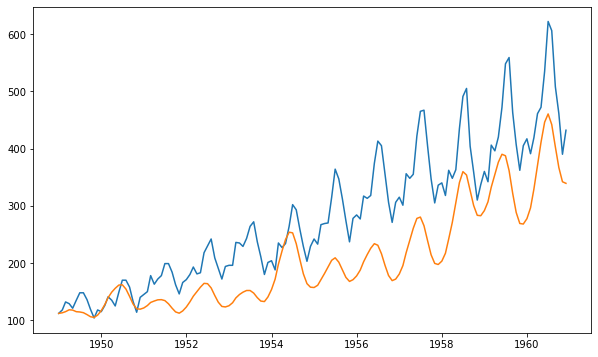

In [45]:
predictions = np.exp(predictions_log)
plt.plot(df)
plt.plot(predictions)

### Future Forecasting
* We have data from 1 Jan 1949 to 1 Dec 1960. 12 years of data with passenger number observation for each month i.e. 144 total observations.
* If we want to forecast for next 5 years or 60 months then, ‘end’ count will be >  144 + 60 = 204.
* We are going to use statsmodels plot_predict() method for it

In [46]:
df_predictions =pd.DataFrame(predictions, columns=['Predicted Values'])
pd.concat([df,df_predictions],axis =1).T

Month,1949-01-01,1949-02-01,1949-03-01,1949-04-01,1949-05-01,1949-06-01,1949-07-01,1949-08-01,1949-09-01,1949-10-01,...,1960-03-01,1960-04-01,1960-05-01,1960-06-01,1960-07-01,1960-08-01,1960-09-01,1960-10-01,1960-11-01,1960-12-01
Passengers,112.0,118.000000,132.000000,129.000000,121.000000,135.000000,148.000000,148.000000,136.000000,119.000000,...,419.000000,461.00000,472.000000,535.000000,622.000000,606.000000,508.000000,461.000000,390.000000,432.000000
Predicted Values,112.0,113.078122,115.073414,118.301986,117.768364,114.988277,114.489524,113.239581,109.900659,106.177218,...,329.213036,370.42902,411.050416,446.085781,460.461324,441.886419,402.905896,366.753491,341.984796,339.216796


In [47]:
dummydt_obj=pd.date_range(start='01-01-1961', end='12-01-1961', freq='M')

In [49]:
dummydt_obj

DatetimeIndex(['1961-01-31', '1961-02-28', '1961-03-31', '1961-04-30',
               '1961-05-31', '1961-06-30', '1961-07-31', '1961-08-31',
               '1961-09-30', '1961-10-31', '1961-11-30'],
              dtype='datetime64[ns]', freq='M')

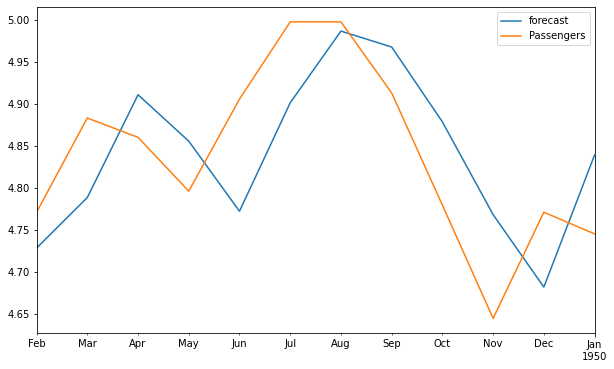

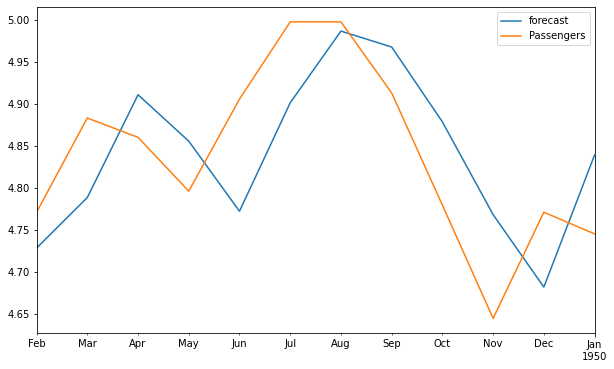

In [50]:
results_ARIMA.plot_predict(start=1, end=12)

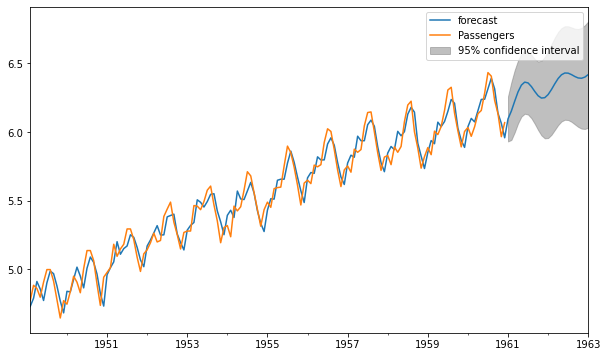

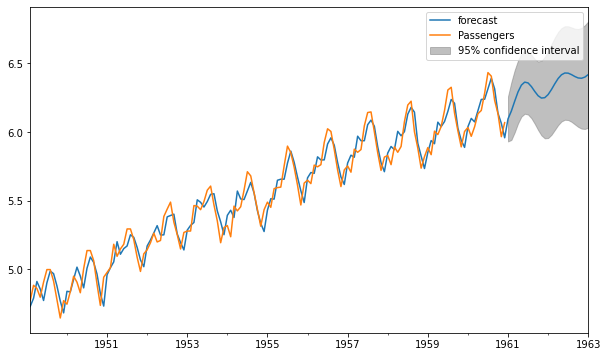

In [54]:
results_ARIMA.plot_predict(start=1, end=168)

In [51]:
results_ARIMA.forecast(steps=30)

(array([6.09553394, 6.15281405, 6.22442968, 6.29241102, 6.34164717,
        6.36359362, 6.35784688, 6.33139308, 6.29597546, 6.2644772 ,
        6.24738332, 6.25025176, 6.27275838, 6.30940311, 6.35151491,
        6.38988652, 6.4172738 , 6.43011055, 6.42906693, 6.41842496,
        6.40456163, 6.39403624, 6.3918309 , 6.40019508, 6.41833694,
        6.44295407, 6.46937434, 6.49293985, 6.5102412 , 6.51989036]),
 array([0.08384711, 0.10749462, 0.11568695, 0.11702776, 0.11703498,
        0.11744018, 0.1176225 , 0.11778714, 0.12024163, 0.12736042,
        0.13870959, 0.15118792, 0.16157813, 0.16834395, 0.1717733 ,
        0.17311983, 0.17358733, 0.1738546 , 0.17430218, 0.17543333,
        0.17788148, 0.18195723, 0.18726218, 0.19283394, 0.19769246,
        0.20130641, 0.20369057, 0.20519835, 0.20625271, 0.20721001]),
 array([[5.93119662, 6.25987126],
        [5.94212847, 6.36349964],
        [5.99768742, 6.45117194],
        [6.06304083, 6.52178122],
        [6.11226283, 6.57103151],
        [6

In [52]:
# Forecasted values in original scale will be
forecast_values_log_scale = results_ARIMA.forecast(steps = 60)
forecast_values_original_scale = np.exp(forecast_values_log_scale[0])

forecast_date_range= pd.date_range("1961-01-01", "1965-12-01", freq="MS")

df_forecast =pd.DataFrame(forecast_values_original_scale, columns=['Forecast'])
df_forecast['Month'] = forecast_date_range

df_forecast[['Month', 'Forecast']]

,Month,Forecast
0,1961-01-01,443.870983
1,1961-02-01,470.038241
2,1961-03-01,504.934985
3,1961-04-01,540.454809
4,1961-05-01,567.730690
5,1961-06-01,580.328095
6,1961-07-01,577.002660
7,1961-08-01,561.938875
8,1961-09-01,542.384663
9,1961-10-01,525.566750


In [54]:
!pip install pmdarima

  Using cached pmdarima-2.0.1-cp39-cp39-win_amd64.whl (571 kB)
  Using cached statsmodels-0.13.5-cp39-cp39-win_amd64.whl (9.2 MB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sarit\\anaconda3\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [55]:
from pmdarima import auto_arima

In [56]:
model=auto_arima(df_log, start_p=0, start_q=0)

In [57]:
model.params()

intercept    0.011599
ar.L1        0.378406
ar.L2       -0.396953
ar.L3        0.501126
ar.L4       -0.635008
ma.L1       -0.300870
ma.L2        0.153577
ma.L3       -0.818460
sigma2       0.006854
dtype: float64

In [58]:
#If there are more than 1 variable. gotta pass into x called xenogenous features. Shouldn't inc constant and trend. 

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                 153.418
Date:                Mon, 07 Nov 2022   AIC                           -288.836
Time:                        18:02:30   BIC                           -262.171
Sample:                    01-01-1949   HQIC                          -278.001
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0116      0.002      7.019      0.000       0.008       0.015
ar.L1          0.3784      0.107      3.548      0.000       0.169       0.587
ar.L2         -0.3970      0.097     -4.078      0.000      -0.588      -0.206
ar.L3          0.5011      0.087      5.767      0.000       0.331       0.671
ar.L4         -0.6350      0.111     -5.731      0.000      -0.852      -0.418
ma.L1         -0.3009      0.114     -2.632      0.008      -0.525      -0.077
ma.L2          0.1536      0.134      1.142      0.253      -0.110       0.417
ma.L3         -0.8185      0.122     -6.698      0.000      -1.058      -0.579
sigma2         0.0069      0.001      5.722      0.000       0.005       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.63   Prob(JB):                         0.60
Heteroskedasticity (H):               1.18   Skew:                             0.09
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\sarit\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  )


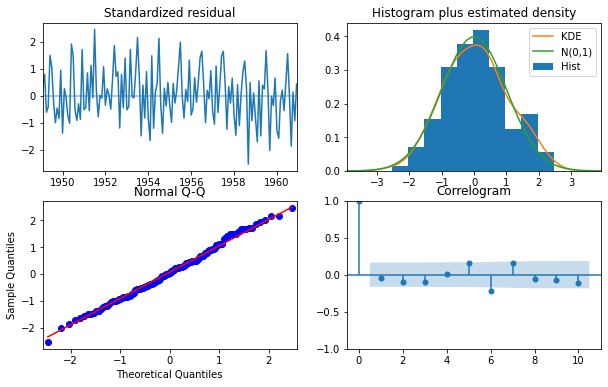

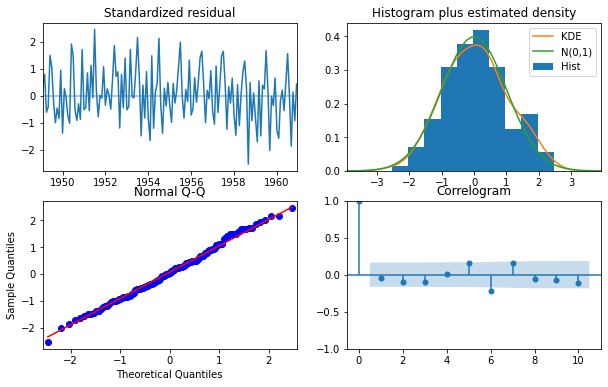

In [60]:
model.plot_diagnostics()